# Welcome to the Dark Art of Coding:
## Introduction to Machine Learning
replace_with_topic

<img src='../universal_images/dark_art_logo.600px.png' width='300' style="float:right">

# Objectives
---

In this session, students should expect to:

* 
* 
* 


* DELETE: Short list of expected outcomes
* DELETE: Use active verbs: Create, Change, Manipulate, Explore, etc.
* DELETE: Keep outcomes measurable, where possible: Success means the thing was created OR the object was changed 

# Overview: Model X
---

In [ ]:
Naive Bayes Classification is fast

Simple, with few tunable parameters

Suitable for high-dimension datasets

Can provide a nice baseline classification to start with

## Prep the data

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Prep the training Data

In [37]:
df = pd.read_csv('../universal_datasets/nbayes_train.csv', 
                 names=['x', 'y', 'category'])

xtrain = df['x']
ytrain = df['y']
category = df['category']

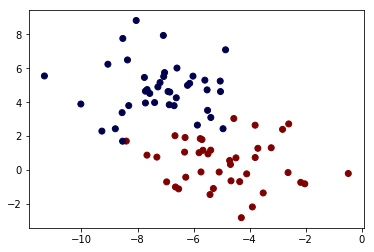

In [38]:
plt.scatter(df['x'], df['y'], c=df['category'],
            cmap='seismic');

### Prep the test data

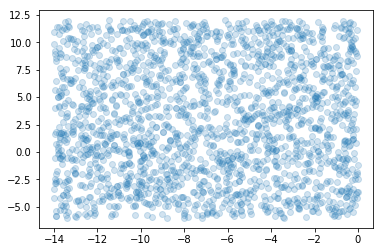

In [39]:
df_test = pd.read_csv('../universal_datasets/nbayes_test.csv',
                     names=['x','y'])

plt.scatter(df_test['x'], df_test['y'], alpha=0.2);

## Choose Model

In [40]:
from sklearn.naive_bayes import GaussianNB

## Choose Hyperparameters

In [41]:
model = GaussianNB()

## Fit the Model

In [42]:
model.fit(df[['x', 'y']], df['category'])

GaussianNB(priors=None, var_smoothing=1e-09)

## Apply the Model

In [48]:
category_test = model.predict(df_test)

In [53]:
category_test.shape

(2000,)

In [54]:
category_test[::100]

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0])

## Examine the results

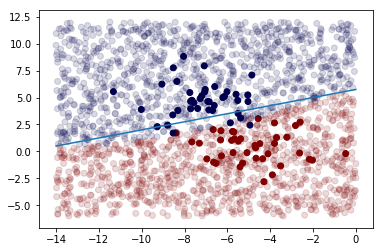

In [55]:
plt.scatter(df['x'], df['y'], c=df['category'],
           cmap='seismic')

plt.scatter(df_test['x'], df_test['y'], c=category_test,
           cmap='seismic',
           alpha=0.15)

plt.plot([-14, 0], [0.5, 5.75]);    

# classifier doesn't necessarily produce a straight line.

# Gotchas
---

# Deep Dive
---

# Gotchas
---

# How to learn more: tips and hints
---

# Experience Points!
---

# delete_this_line: task 01

In **`jupyter`** create a simple script to complete the following tasks:


**REPLACE THE FOLLOWING**

Create a function called `me()` that prints out 3 things:

* Your name
* Your favorite food
* Your favorite color

Lastly, call the function, so that it executes when the script is run

---
When you complete this exercise, please put your **green** post-it on your monitor. 

If you want to continue on at your own-pace, please feel free to do so.

<img src='../universal_images/green_sticky.300px.png' width='200' style='float:left'>

# Experience Points!
---

# delete_this_line: task 02

In **`jupyter`** create a simple script to complete the following tasks:

**REPLACE THE FOLLOWING**

Task | Sample Object(s)
:---|:---
Compare two items using `and` | 'Bruce', 0
Compare two items using `or` | '', 42
Use the `not` operator to make an object False | 'Selina' 
Compare two numbers using comparison operators | `>, <, >=, !=, ==`
Create a more complex/nested comparison using parenthesis and Boolean operators| `('kara' _ 'clark') _ (0 _ 0.0)`

---
When you complete this exercise, please put your **green** post-it on your monitor. 

If you want to continue on at your own-pace, please feel free to do so.

<img src='../universal_images/green_sticky.300px.png' width='200' style='float:left'>

# Experience Points!
---

# delete_this_line: sample 03

In your **text editor** create a simple script called:

```bash
my_lessonname_03.py```

Execute your script on the command line using **`ipython`** via this command:

```bash
ipython -i my_lessonname_03.py```

**REPLACE THE FOLLOWING**

I suggest that as you add each feature to your script that you run it right away to test it incrementally. 

1. Create a variable with your first name as a string AND save it with the label: `myfname`.
1. Create a variable with your age as an integer AND save it with the label: `myage`.

1. Use `input()` to prompt for your first name AND save it with the label: `fname`.
1. Create an `if` statement to test whether `fname` is equivalent to `myfname`. 
1. In the `if` code block: 
   1. Use `input()` prompt for your age AND save it with the label: `age` 
   1. NOTE: don't forget to convert the value to an integer.
   1. Create a nested `if` statement to test whether `myage` and `age` are equivalent.
1. If both tests pass, have the script print: `Your identity has been verified`

When you complete this exercise, please put your **green** post-it on your monitor. 

If you want to continue on at your own-pace, please feel free to do so.

<img src='../universal_images/green_sticky.300px.png' width='200' style='float:left'>

# References
---

Below are references that may assist you in learning more:
    
|Title (link)|Comments|
|---|---|
|[An Example](https://www.example.html)|Fun factoids|